In [4]:
import os
print(os.getcwd())

c:\Users\Oscar\Project ADA\ada-2024-project-teamcsx24\plotidea


In [6]:
import os
import pandas as pd
# Vérifier le contenu du dossier MovieSummaries
dossier = '../data/MovieSummaries'
fichiers = os.listdir(dossier)
print(fichiers)

['character.metadata.tsv', 'movie.metadata.tsv', 'name.clusters.txt', 'plot_summaries.txt', 'README.txt', 'tvtropes.clusters.txt']


In [7]:
# Charger le fichier de résumés de films avec le chemin correct
plot_summaries_df = pd.read_csv(os.path.join(dossier, 'plot_summaries.txt'), sep='\t', header=None, names=['movie_id', 'summary'])

# Afficher les premières lignes
plot_summaries_df.head()

,movie_id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [6]:
plot_summaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  42303 non-null  int64 
 1   summary   42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [7]:
plot_summaries_df.describe()

,movie_id
count,4.230300e+04
mean,1.497051e+07
std,1.111994e+07
min,3.300000e+02
25%,4.565802e+06
50%,1.284591e+07
75%,2.485168e+07
max,3.750192e+07


In [8]:
plot_summaries_df.isnull().sum()

movie_id    0
summary     0
dtype: int64

In [9]:
plot_summaries_df['word_count'] = plot_summaries_df['summary'].apply(lambda x: len(x.split()))
plot_summaries_df.describe()

,movie_id,word_count
count,4.230300e+04,42303.000000
mean,1.497051e+07,310.740468
std,1.111994e+07,318.338286
min,3.300000e+02,4.000000
25%,4.565802e+06,87.000000
50%,1.284591e+07,187.000000
75%,2.485168e+07,454.000000
max,3.750192e+07,4929.000000


Note : Plot summaries plutôt clean. 42 303 films sans valeurs nulles, tailles des summaries facilement accessibles

In [10]:
movie_metadata_df = pd.read_csv(os.path.join(dossier, 'movie.metadata.tsv'), sep='\t', header=None, 
                                 names=['wiki_movie_id', 'freebase_movie_id', 'movie_name', 
                                        'release_date', 'box_office_revenue', 'runtime', 
                                        'languages', 'countries', 'genres'])

# Afficher les premières lignes
movie_metadata_df.head()

,wiki_movie_id,freebase_movie_id,movie_name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [11]:
movie_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   wiki_movie_id       81741 non-null  int64  
 1   freebase_movie_id   81741 non-null  object 
 2   movie_name          81741 non-null  object 
 3   release_date        74839 non-null  object 
 4   box_office_revenue  8401 non-null   float64
 5   runtime             61291 non-null  float64
 6   languages           81741 non-null  object 
 7   countries           81741 non-null  object 
 8   genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [12]:
movie_metadata_df.isnull().sum()

wiki_movie_id             0
freebase_movie_id         0
movie_name                0
release_date           6902
box_office_revenue    73340
runtime               20450
languages                 0
countries                 0
genres                    0
dtype: int64

In [13]:
movie_metadata_df.describe().drop(['wiki_movie_id'],axis = 1)

,box_office_revenue,runtime
count,8.401000e+03,6.129100e+04
mean,4.799363e+07,1.118192e+02
std,1.121753e+08,4.360070e+03
min,1.000000e+04,0.000000e+00
25%,2.083193e+06,8.100000e+01
50%,1.063969e+07,9.300000e+01
75%,4.071696e+07,1.060000e+02
max,2.782275e+09,1.079281e+06


In [14]:
movie_metadata_df['genres'].value_counts()

genres
{"/m/07s9rl0": "Drama"}                                                                                                                                                                     6851
{}                                                                                                                                                                                          2294
{"/m/01z4y": "Comedy"}                                                                                                                                                                      2040
{"/m/0jtdp": "Documentary"}                                                                                                                                                                 2001
{"/m/05p553": "Comedy film"}                                                                                                                                                                1387
                            

Movie_metadata : Il manque beaucoup de données, particulièrement sur le box-office revenue et le runtime où c'est assez vide. 

En ce qui concerne le format des données il faudrait uniformiser le format de ddate (en année serait le plus simple), pour language country et genre le format est moche aussi. Plusieurs languages/genres/ Country pour chaque films, comment on gère ça ? Duplication de ligne ? rajout de colonne avec Genre 1/ Genre 2/ Genre 3 ? à nous de choisir pour faire au plus simple

ce qui serait intéressant à voir : nombre de genre au total, nombre maximal de genre pour un film, répartition des genres/ langues / country.

Répartition du runtime, repartition du box office (en boxplot des genres de films encore plus intéressant). A voir en fonction du projet choisis

essayer de voir de quand datent les films. 

plus de films dans le metadata, voir combien de films correpsondent par rapport a la table summary


In [15]:
# Charger les métadonnées des personnages avec le chemin correct
character_metadata_df = pd.read_csv(os.path.join(dossier, 'character.metadata.tsv'), sep='\t', header=None, 
                                     names=['wiki_movie_id', 'freebase_movie_id', 'release_date', 
                                            'character_name', 'actor_dob', 'actor_gender', 
                                            'actor_height', 'actor_ethnicity', 'actor_name', 
                                            'actor_age', 'freebase_character_actor_map_id', 
                                            'freebase_character_id', 'freebase_actor_id'])

# Afficher les premières lignes
character_metadata_df.head()

,wiki_movie_id,freebase_movie_id,release_date,character_name,actor_dob,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_character_actor_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [16]:
character_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450669 entries, 0 to 450668
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   wiki_movie_id                    450669 non-null  int64  
 1   freebase_movie_id                450669 non-null  object 
 2   release_date                     440674 non-null  object 
 3   character_name                   192794 non-null  object 
 4   actor_dob                        344524 non-null  object 
 5   actor_gender                     405060 non-null  object 
 6   actor_height                     154824 non-null  float64
 7   actor_ethnicity                  106058 non-null  object 
 8   actor_name                       449441 non-null  object 
 9   actor_age                        292556 non-null  float64
 10  freebase_character_actor_map_id  450669 non-null  object 
 11  freebase_character_id            192804 non-null  object 
 12  fr

In [17]:
character_metadata_df.isnull().sum()

wiki_movie_id                           0
freebase_movie_id                       0
release_date                         9995
character_name                     257875
actor_dob                          106145
actor_gender                        45609
actor_height                       295845
actor_ethnicity                    344611
actor_name                           1228
actor_age                          158113
freebase_character_actor_map_id         0
freebase_character_id              257865
freebase_actor_id                     815
dtype: int64

In [18]:
character_metadata_df.describe()

,wiki_movie_id,actor_height,actor_age
count,4.506690e+05,154824.000000,292556.000000
mean,1.396975e+07,1.788893,37.788523
std,1.079662e+07,4.379940,20.587870
min,3.300000e+02,0.610000,-7896.000000
25%,3.759292e+06,1.676400,28.000000
50%,1.189065e+07,1.750000,36.000000
75%,2.366501e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


Des bizarreries ici

In [19]:
character_metadata_df['actor_gender'].value_counts()

actor_gender
M    270257
F    134803
Name: count, dtype: int64

<Axes: >

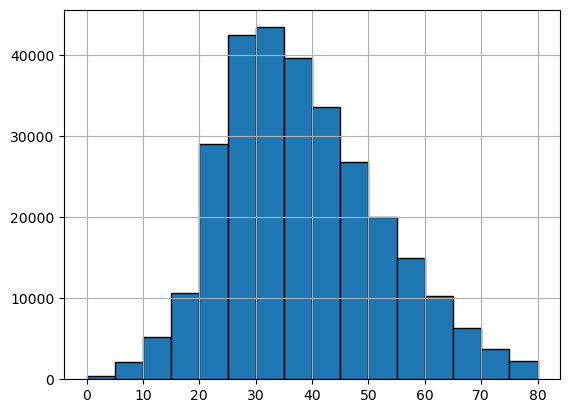

In [20]:
import seaborn as sns
import matplotlib as plt

character_metadata_df['actor_age'].hist(bins=range(0, 85, 5),edgecolor='black')

In [21]:
character_metadata_df['actor_ethnicity'].value_counts()

actor_ethnicity
/m/0dryh9k    16351
/m/0x67       10159
/m/041rx      10121
/m/02w7gg      6165
/m/033tf_      3857
              ...  
/m/043_z22        1
/m/03x_fq7        1
/m/01hphz         1
/m/033fjj         1
/m/013y54         1
Name: count, Length: 479, dtype: int64

Plusieurs choses à noter : beaucoup de données manquantes à voir comment gérer cela. Ethnicity encodé je ne sais pas comment, il faudrait trouver un moyen de voir à quoi cela correpond. 

Encore une fois il faudrait faire une liste des films qu'on retrouve dans la table character et dans la table metadata movie. A voir ce que l'on veut faire comme projet suivant les data manquantes et les datas accessibles.

Il faudrait voir comment merge les 3 tables également en fonction des films qui sont présents dans les 3.

Conclusion :

Les données sont clean dans l'excel du plot summary. Elle ne sont pas trop lourde en l'état et on peut les manipuler en local.

    - De nombreuses valeurs nulles dans les 2 tables metadata, à voir comment nous pouvons les gérer en fonction du projet choisis
    - Certaines colonnes ont des formats particulier (movie genre, country, language, ethni) pas forcément facile à manipuler. Se mettre d'accord sur un format et tranformer la donner dans ces cas
    - étudier les jonctions des films entre les différentes table pour voir les intersections et quelles études peuvent être menées entre les tables.
    - quelques valeurs abhérentes qui seront aussi à traiter comme les valeurs nulles 

In [25]:
# Convertir les colonnes d'identifiant en ensembles pour trouver les intersections
plot_movie_ids = set(plot_summaries_df['movie_id'])
metadata_movie_ids = set(movie_metadata_df['wiki_movie_id'])

# Calculer l'intersection des deux ensembles
common_movie_ids = plot_movie_ids.intersection(metadata_movie_ids)

# Afficher le nombre de films présents dans les deux tables
print("Nombre de films présents dans les deux tables :", len(common_movie_ids))

Nombre de films présents dans les deux tables : 42204


In [26]:
# Convertir les colonnes d'identifiant en ensembles pour trouver les intersections
character_metadata_ids = set(character_metadata_df['wiki_movie_id'])
metadata_movie_ids = set(movie_metadata_df['wiki_movie_id'])

# Calculer l'intersection des deux ensembles
common_movie_ids = character_metadata_ids.intersection(metadata_movie_ids)

# Afficher le nombre de films présents dans les deux tables
print("Nombre de films présents dans les deux tables :", len(common_movie_ids))

Nombre de films présents dans les deux tables : 64330


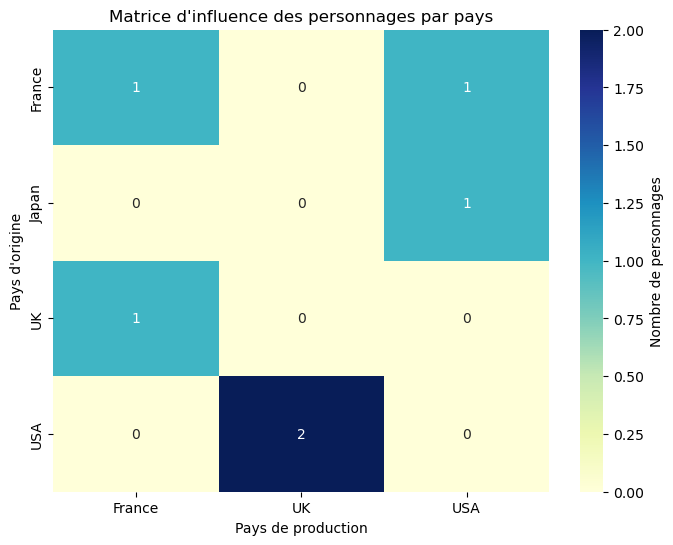

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de données
data = {
    'Personnage': ['Personnage1', 'Personnage2', 'Personnage3', 'Personnage4', 'Personnage5', 'Personnage6'],
    'Pays d\'origine': ['France', 'USA', 'France', 'Japan', 'UK', 'USA'],
    'Pays de production': ['USA', 'UK', 'France', 'USA', 'France', 'UK']
}

# Création du DataFrame
df = pd.DataFrame(data)

# Création de la matrice d'influence
matrice_influence = pd.crosstab(df['Pays d\'origine'], df['Pays de production'])

# Visualisation de la matrice avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_influence, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Nombre de personnages'})
plt.title('Matrice d\'influence des personnages par pays')
plt.xlabel('Pays de production')
plt.ylabel('Pays d\'origine')
plt.show()